In [1]:
import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 



data = pd.read_excel('../../data/health_screenings_2020_1000ea.xlsx')



In [2]:
# 컬럼 선택 

data1 = data.loc[:, ['gender','height','weight','waist','smoking','drinking']] 

 

In [3]:
# 성별별 매핑 

gender = {1: 'male', 2:'female'} 

In [4]:
# 성별, 음주여부별 음주인원수 

drinking = data1.groupby(['gender','drinking'])['drinking'].count() #  이중 리스트를 쓰면 Series에서 DataFrame으로 변경 

drinking = drinking.to_frame(name='count') 

drinking = drinking.reset_index() 

drinking['gender'] = drinking['gender'].map(gender) 

drinking['drinking'] = drinking['drinking'].replace(0,'Non-drinking').replace(1,'Drinking') 

drinking 

,gender,drinking,count
0,male,Non-drinking,126
1,male,Drinking,356
2,female,Non-drinking,305
3,female,Drinking,213


In [5]:
# 성별, 흡연여부별 흡연인원수 

smoking = data1.groupby(['gender','smoking'])['smoking'].count() 

smoking = smoking.to_frame(name='count') # Series에서 DataFrame으로 변경 

smoking = smoking.reset_index() 

smoking['gender'] = smoking['gender'].map(gender) 

smoking['smoking'] = smoking['smoking'].replace(1,'Non-smoking').replace(2,'Non-smoking').replace(3, 'Smoking') 

smoking 

,gender,smoking,count
0,male,Non-smoking,145
1,male,Non-smoking,176
2,male,Smoking,161
3,female,Non-smoking,488
4,female,Non-smoking,12
5,female,Smoking,18


In [7]:
# 성별별 체중, 허리둘레 관계 파악 

data2 = data.loc[:,['gender','weight','waist']] 

data2.head(2) 

,gender,weight,waist
0,1,60,72.1
1,2,65,81.0


In [8]:
 

# 데이터 간 상관관계 분석 

data2.corr() 

,gender,weight,waist
gender,1.000000,-0.582641,-0.431970
weight,-0.582641,1.000000,0.787645
waist,-0.431970,0.787645,1.000000


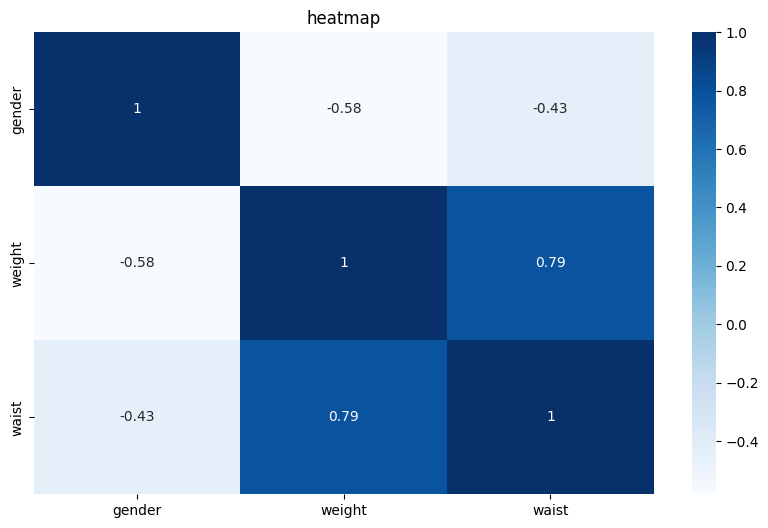

In [9]:
# 히트맵 그리기 

plt.figure(figsize=(10,6)) 

plt.title('heatmap') 

corr_data2 = data2.corr() 

sns.heatmap(corr_data2, annot=True, cmap='Blues') 

plt.show() 